<a href="https://colab.research.google.com/github/JuHyeon-S/20-1-Image_Processing/blob/master/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

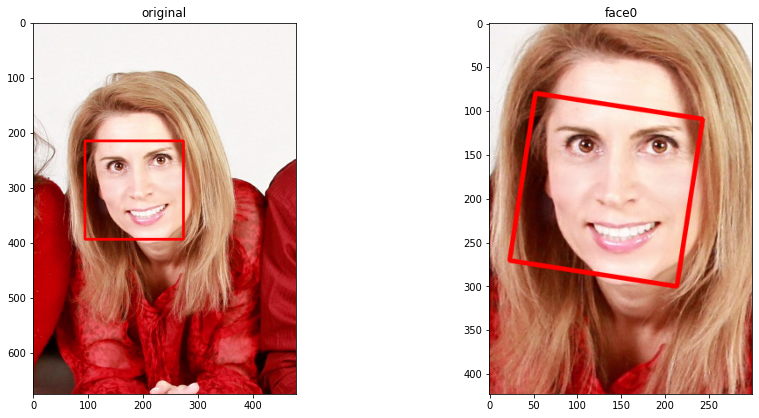

In [22]:
import dlib
import cv2
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

np.set_printoptions(precision=2)

# 얼굴 검출기를 생성한다.
faceDetector = dlib.get_frontal_face_detector()
# 68 face landmarks 모델을 사용한다.
landmarkDetector = dlib.shape_predictor("data/models/shape_predictor_68_face_landmarks.dat")

# 얼굴을 검출할 이미지를 불러온다.
im = cv2.imread("images/face2.png")

# 출력 얼굴 영상 크기 -> 300x?
w = 300
h = np.int(w * im.shape[0]/im.shape[1])

# 검출기로 얼굴 검출을 시작한다. upsample 안함
faceRects = faceDetector(im, 0)

# 검출된 얼굴에 사각형을 그리는 반복문이다.
for i in range(0, len(faceRects)):
    x1 = faceRects[i].left()
    y1 = faceRects[i].top()
    x2 = faceRects[i].right()
    y2 = faceRects[i].bottom()
    cv2.rectangle(im, (x1, y1), (x2, y2), (0, 0, 255), 3)

  # 검출된 얼굴의 눈의 위치를 잡는다. 
  # 여기서는 눈꼬리를 기준으로 하였다.
    landmarks = landmarkDetector(im, faceRects[i])
    point2 = (landmarks.part(36).x, landmarks.part(36).y)
    point0 = (landmarks.part(45).x, landmarks.part(45).y)
    eyecornerSrc = [point2, point0]
    eyecornerDst = [(np.int(0.3 * w), np.int(h/3)),(np.int(0.7 * w), np.int(h/3))]
  
  # 어핀 변환을 계산한다.
    ret = cv2.estimateAffinePartial2D(np.array([eyecornerSrc]), np.array([eyecornerDst]))
    xform = ret[0]

  # 변환을 실행한다.
    imOut = cv2.warpAffine(im, xform, (w, h))

  # 변환된 이미지를 출력한다.
    plt.figure(figsize=[15,15])
    plt.subplot(222)
    plt.imshow(imOut[:,:,::-1]); plt.title('face'+np.str(i))
    
# 원본이미지를 출력한다.
plt.subplot(221)
plt.imshow(im[:,:,::-1])
plt.title("original")
plt.show()

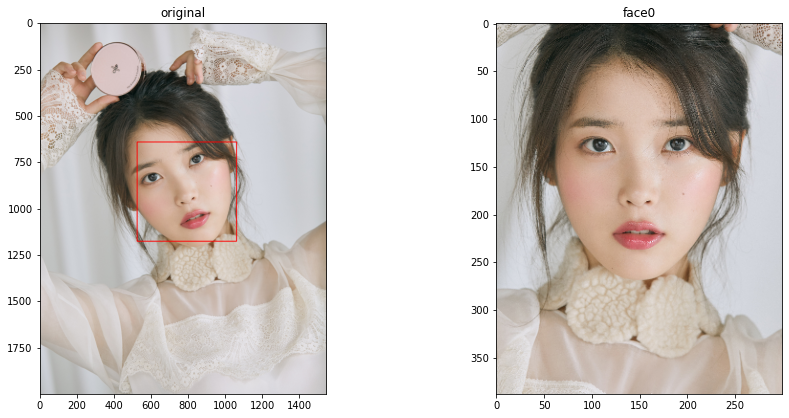

In [21]:
import dlib
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

np.set_printoptions(precision=2)

# 얼굴 검출기를 생성한다.
faceDetector = dlib.get_frontal_face_detector()
# 68 face landmarks 모델을 사용한다.
landmarkDetector = dlib.shape_predictor("data/models/shape_predictor_68_face_landmarks.dat")

# 얼굴을 검출할 이미지를 불러온다.
im = cv2.imread("images/iu.jpg")
im2 = im.copy()

# 출력 얼굴 영상 크기 -> 300x?
w = 300
h = np.int(w * im.shape[0]/im.shape[1])

# 검출기로 얼굴 검출을 시작한다. upsample 안함
faceRects = faceDetector(im, 0)
faceRects2 = faceDetector(im2, 0)

# 검출된 얼굴에 사각형을 그리는 반복문이다.
for i in range(0, len(faceRects)):
    x1 = faceRects[i].left()
    y1 = faceRects[i].top()
    x2 = faceRects[i].right()
    y2 = faceRects[i].bottom()
    cv2.rectangle(im, (x1, y1), (x2, y2), (0, 0, 255), 3)

# 카피한 파일에서는 얼굴에 사각형을 그리지 않고 바로 눈을 검출한다,
for i in range(0, len(faceRects2)):
   # 검출된 얼굴의 눈의 위치를 잡는다. 
  # 여기서는 눈꼬리를 기준으로 하였다.
    landmarks = landmarkDetector(im2, faceRects[i])
    point2 = (landmarks.part(36).x, landmarks.part(36).y)
    point0 = (landmarks.part(45).x, landmarks.part(45).y)
    eyecornerSrc = [point2, point0]
    eyecornerDst = [(np.int(0.3 * w), np.int(h/3)),
                  (np.int(0.7 * w), np.int(h/3))]
  
  # 어핀 변환을 계산한다.
    ret = cv2.estimateAffinePartial2D(np.array([eyecornerSrc]), np.array([eyecornerDst]))
    xform = ret[0]

  # 변환을 실행한다.
  # 변환된 이미지를 출력한다.
    imOut = cv2.warpAffine(im2, xform, (w, h))
    plt.figure(figsize=[15,15])
    plt.subplot(222)
    plt.imshow(imOut[:,:,::-1]); plt.title('face'+np.str(i))

# 원본 이미지를 출력한다.
plt.subplot(221)
plt.imshow(im[:,:,::-1])
plt.title("original")
plt.show()